## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

./camera_cal/calibration6.jpg


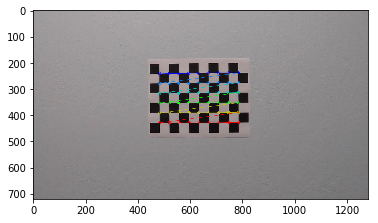

./camera_cal/calibration7.jpg


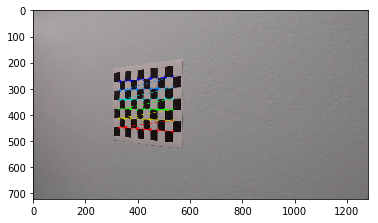

./camera_cal/calibration3.jpg


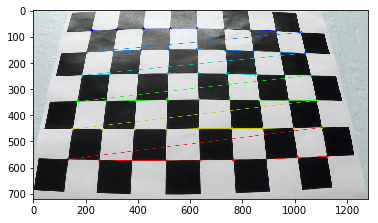

./camera_cal/calibration2.jpg


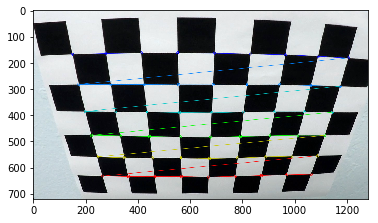

./camera_cal/calibration20.jpg


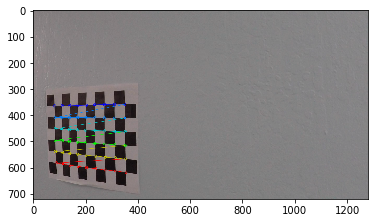

./camera_cal/calibration19.jpg


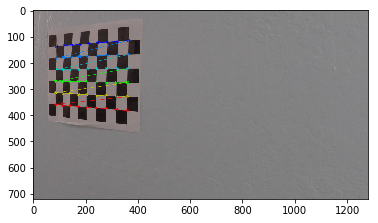

./camera_cal/calibration18.jpg


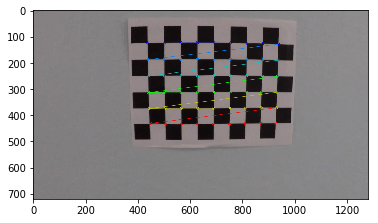

./camera_cal/calibration15.jpg


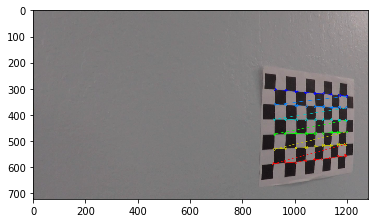

./camera_cal/calibration14.jpg


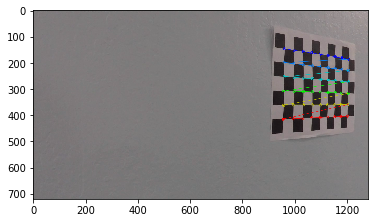

./camera_cal/calibration16.jpg


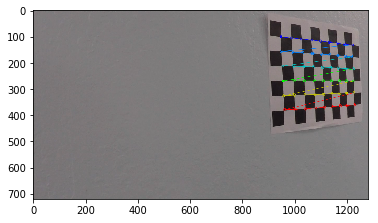

./camera_cal/calibration17.jpg


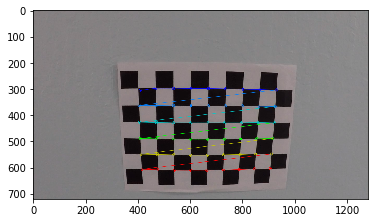

./camera_cal/calibration13.jpg


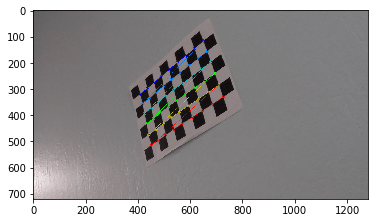

./camera_cal/calibration12.jpg


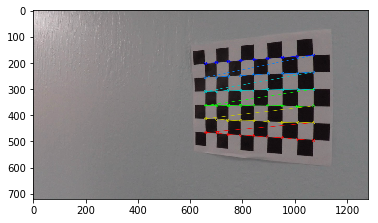

./camera_cal/calibration10.jpg


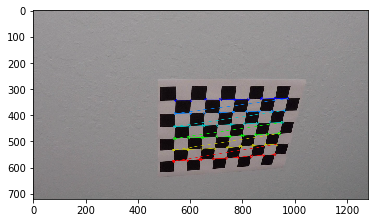

./camera_cal/calibration11.jpg


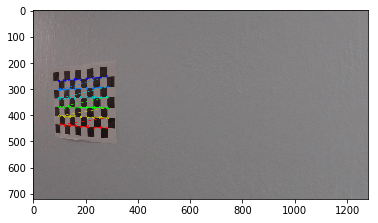

./camera_cal/calibration9.jpg


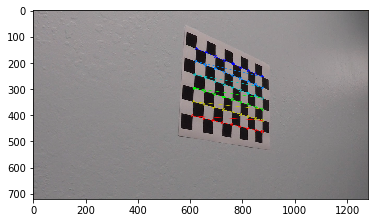

./camera_cal/calibration8.jpg


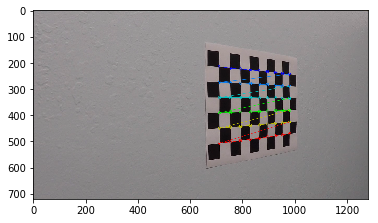

dict_keys([2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


In [11]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

imgs={}

# Step through the list and search for chessboard corners
for i,fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    imgsIn=[]



    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)

        print(fname)
        plt.imshow(img)
        imgsIn.append(img)
        imgsIn.append(objp)
        imgsIn.append(corners)
   
        imgs[i]=imgsIn
        
        plt.show()

        
                
print(imgs.keys())




distVal [[[ 26  25  29]
  [ 27  26  30]
  [ 26  25  29]
  ..., 
  [232 231 233]
  [234 232 234]
  [235 232 234]]

 [[ 26  25  29]
  [ 26  25  29]
  [ 26  25  29]
  ..., 
  [232 231 233]
  [234 231 233]
  [234 231 233]]

 [[ 26  25  29]
  [ 26  25  29]
  [ 27  24  29]
  ..., 
  [232 231 233]
  [233 231 233]
  [233 230 232]]

 ..., 
 [[221 220 222]
  [220 219 221]
  [219 218 220]
  ..., 
  [  7  11  12]
  [  8  12  13]
  [  8  12  13]]

 [[220 219 221]
  [220 219 221]
  [220 219 221]
  ..., 
  [  8  12  13]
  [  8  12  13]
  [  9  13  14]]

 [[221 219 221]
  [222 220 222]
  [223 221 223]
  ..., 
  [ 10  10  14]
  [ 10  11  14]
  [ 11  12  14]]] mtx 
 [[  1.15777818e+03   0.00000000e+00   6.67113857e+02]
 [  0.00000000e+00   1.15282217e+03   3.86124583e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]] dist 
 [[-0.24688507 -0.02373155 -0.00109831  0.00035107 -0.00259867]]


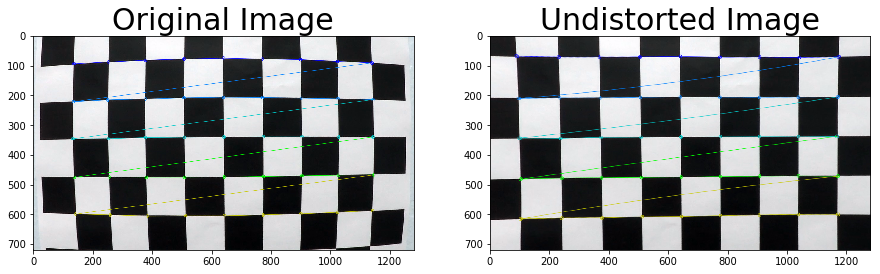

In [33]:
readImg2 = glob.glob('./camera_cal/calibration1.jpg')
unDistImg = cv2.imread('./camera_cal/calibration1.jpg')

def cal_undistort(img,objponts):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,corners = cv2.findChessboardCorners(gray,(9,5),None)#here 9,5 is used because only 9,5 are visiable

    img=cv2.drawChessboardCorners(img,(9,5),corners,ret)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1],None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    return dst,mtx,dist

undist,mtx,dist = cal_undistort(unDistImg, objpoints)
print("distVal",undist,"mtx \n",mtx,"dist \n",dist)

# Visualize undistortion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
ax1.imshow(unDistImg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()

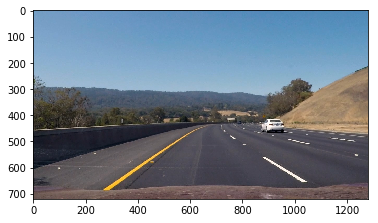

In [29]:
exampleImg=mpimg.imread('./test_images/test3.jpg')
plt.imshow(exampleImg)
plt.show()

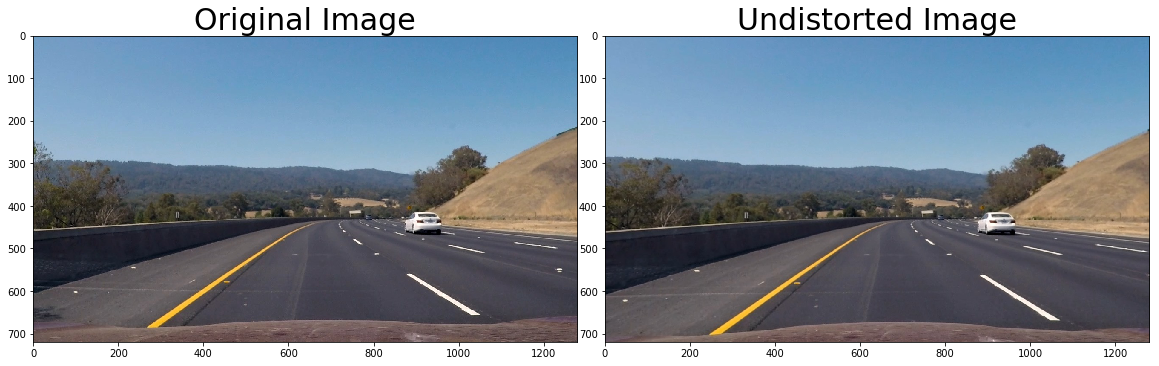

In [38]:
def undistort(img,mtx, dist):

    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

exampleImg_undistort = undistort(exampleImg,mtx,dist)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(exampleImg_undistort)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()

In [44]:
def unWarpedImg(img,src,dst):
    M = cv2.getPerspectiveTransform(src, dst)

    Minv = cv2.getPerspectiveTransform(dst, src)

    warped=cv2.warpPerspective(img,M,img.shape[1::-1],flags=cv2.INTER_LINEAR)
    return warped,M,Minv







[580.0, 250.0, 1105.0, 745.0, 580.0]
[464.0, 682.0, 682.0, 464.0, 464.0]


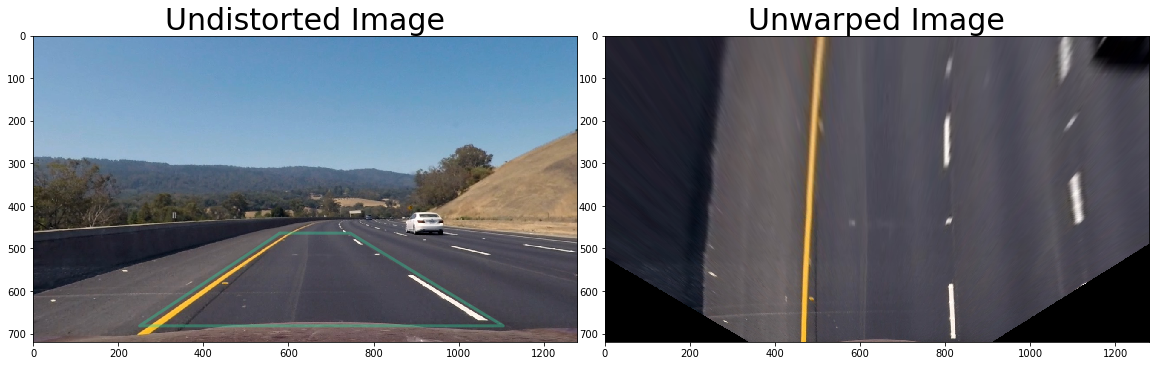

In [113]:
src = np.float32([(580,464),
                  (745,464), 
                  (250,682), 
                  (1105,682)])
dst = np.float32([(450,0),
                  (830,0),
                  (450,720),
                  (830,720)])
exampleImg_unwarp, M, Minv = unWarpedImg(exampleImg_undistort, src, dst)

# Visualize unwarp
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg_undistort)
x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
print(x)
y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]
print(y)
ax1.plot(x, y, color='#33cc99', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)

ax1.set_title('Undistorted Image', fontsize=30)
ax2.imshow(exampleImg_unwarp)
ax2.set_title('Unwarped Image', fontsize=30)
plt.show()


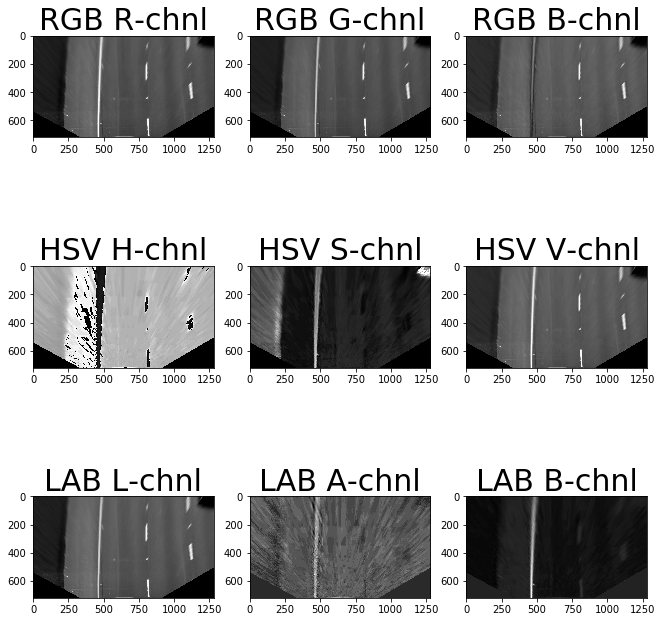

In [104]:
exampleImg_unwarp_R = exampleImg_unwarp[:,:,0]
exampleImg_unwarp_G = exampleImg_unwarp[:,:,1]
exampleImg_unwarp_B = exampleImg_unwarp[:,:,2]

exampleImg_unwarp_HSV = cv2.cvtColor(exampleImg_unwarp, cv2.COLOR_RGB2HSV)
exampleImg_unwarp_H = exampleImg_unwarp_HSV[:,:,0]
exampleImg_unwarp_S = exampleImg_unwarp_HSV[:,:,1]
exampleImg_unwarp_V = exampleImg_unwarp_HSV[:,:,2]

exampleImg_unwarp_LAB = cv2.cvtColor(exampleImg_unwarp, cv2.COLOR_RGB2Lab)
exampleImg_unwarp_L = exampleImg_unwarp_LAB[:,:,0]
exampleImg_unwarp_A = exampleImg_unwarp_LAB[:,:,1]
exampleImg_unwarp_B2 = exampleImg_unwarp_LAB[:,:,2]
# fig,axs=plt.subplot(1,0,figsize=(11,11))
# axs=axs.ravel()
fig, axs = plt.subplots(3,3, figsize=(11, 12))
# fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
axs[0].imshow(exampleImg_unwarp_R, cmap='gray')
axs[0].set_title('RGB R-chnl', fontsize=30)
axs[1].imshow(exampleImg_unwarp_G, cmap='gray')
axs[1].set_title('RGB G-chnl', fontsize=30)
axs[2].imshow(exampleImg_unwarp_B, cmap='gray')
axs[2].set_title('RGB B-chnl', fontsize=30)

axs[3].imshow(exampleImg_unwarp_H, cmap='gray')
axs[3].set_title('HSV H-chnl', fontsize=30)
axs[4].imshow(exampleImg_unwarp_S, cmap='gray')
axs[4].set_title('HSV S-chnl', fontsize=30)
axs[5].imshow(exampleImg_unwarp_V, cmap='gray')
axs[5].set_title('HSV V-chnl', fontsize=30)

axs[6].imshow(exampleImg_unwarp_L, cmap='gray')
axs[6].set_title('LAB L-chnl', fontsize=30)
axs[7].imshow(exampleImg_unwarp_A, cmap='gray')
axs[7].set_title('LAB A-chnl', fontsize=30)
axs[8].imshow(exampleImg_unwarp_B2, cmap='gray')
axs[8].set_title('LAB B-chnl', fontsize=30)
plt.show()




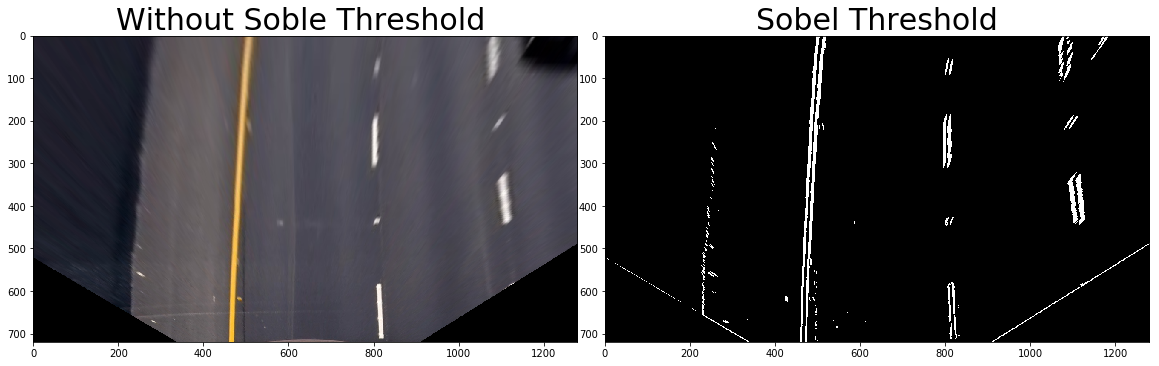

In [124]:
def abs_sobel_threshold(img,orient='x',thresh_min=0,thresh_max=255):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    if orient=='x':
        abs_sobel = np.absolute(cv2.Sobel(gray,cv2.CV_64F,1,0))
    if orient=='y':
        abs_sobel = np.absolute(cv2.Sobel(gray,cv2.CV_64F,0,1))
    scaled_sobel=np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output=np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel>=thresh_min) & (scaled_sobel<=thresh_max) ]=1
    return binary_output

sobelOperaterImg=abs_sobel_threshold(exampleImg_unwarp,orient='x',thresh_min=20,thresh_max=200)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg_unwarp,cmap='gray')
ax1.set_title('Without Soble Threshold ', fontsize=30)
ax2.imshow(sobelOperaterImg,cmap='gray')
ax2.set_title('Sobel Threshold', fontsize=30)
plt.show()



In [118]:
def mag_thresh(img,sobel_kernel=3,mag_thresh=(0,255)):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    
    gradmag=np.sqrt(sobelx**2,sobely**2)
    scale_factor=np.max(gradmag)/255
    
    gradmag = (gradmag/scale_factor).astype(np.uint8)
    
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag>=mag_thresh[0])&(gradmag<=mag_thresh[1])]=1
    
    return binary_output


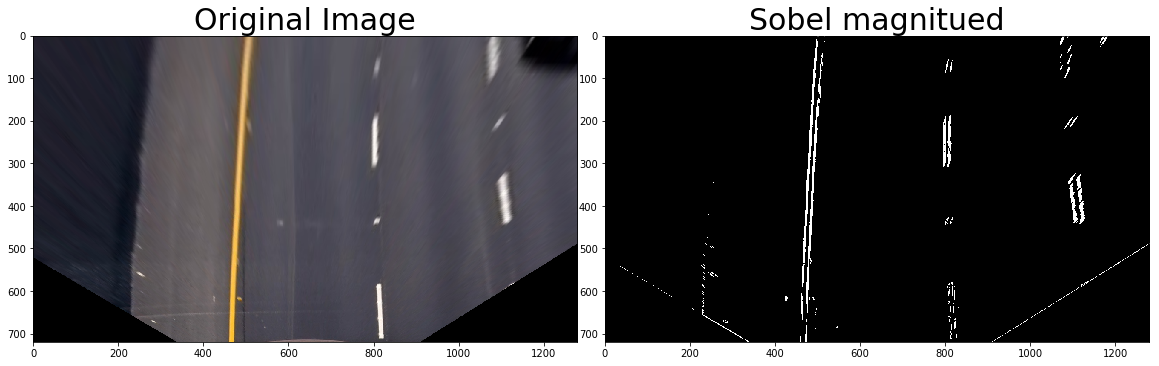

In [126]:
mag_thresh_val=mag_thresh(exampleImg_unwarp,sobel_kernel=3, mag_thresh=(30, 100))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg_unwarp,cmap='gray')
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(mag_thresh_val,cmap='gray')
ax2.set_title('Sobel magnitued', fontsize=30)
plt.show()


In [208]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    absgraddir = np.absolute(absgraddir)

    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

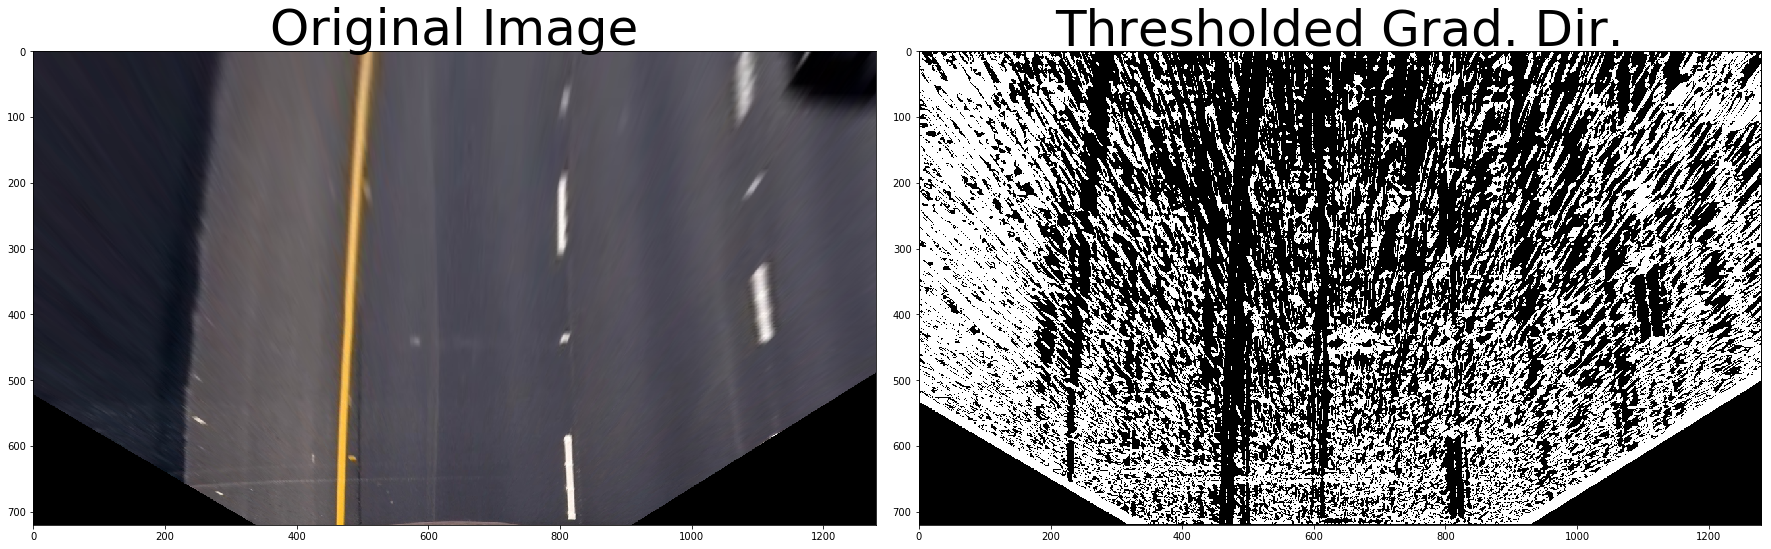

In [209]:
dir_binary = dir_threshold(exampleImg_unwarp, sobel_kernel=15, thresh=(.5, 1.5))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(exampleImg_unwarp,cmap='gray')
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

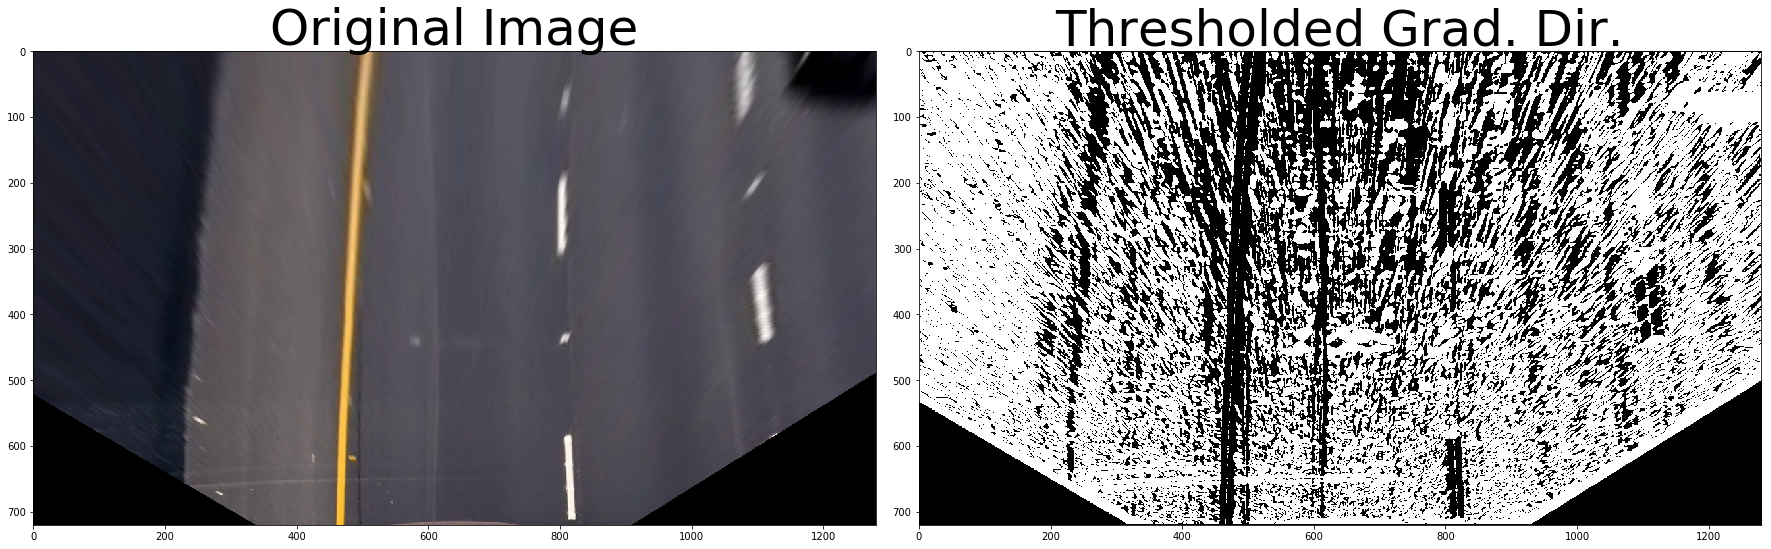

In [202]:
dir_binary = dir_threshold(exampleImg_unwarp, sobel_kernel=15, thresh=(.3, np.pi/2))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(exampleImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()